In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [12]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten_crops2'

In [13]:
img_list = os.listdir(input_path)

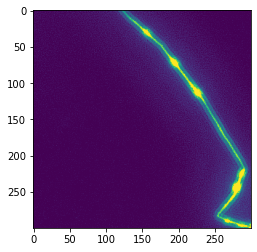

In [32]:
current_img_path = os.path.join(input_path, img_list[0])
current_img = cv2.imread(current_img_path, 0)
plt.imshow(current_img)

In [33]:
row, col = current_img.shape
print("the row and col are: ", row, col)

the row and col are:  300 300


In [34]:
centerRow, centerCol = int(row/2), int(col/2)
print("center row and col are: ", centerRow, centerCol)

center row and col are:  150 150


In [35]:
centerRectangle = 7

[[148.54288  160.50018  152.07484  ... 148.33078  152.07484  160.50018 ]
 [130.7169   133.2689   140.77647  ... 161.40602  123.509735 148.02332 ]
 [144.84143  139.24445  162.58714  ... 143.99779  139.0275   143.83417 ]
 ...
 [153.02234  142.44977  150.47559  ... 146.292    155.4537   157.3919  ]
 [144.84143  143.83417  139.0275   ... 147.47054  162.58714  139.24445 ]
 [130.7169   148.02332  123.509735 ... 147.30257  140.77647  133.2689  ]]
152.45364


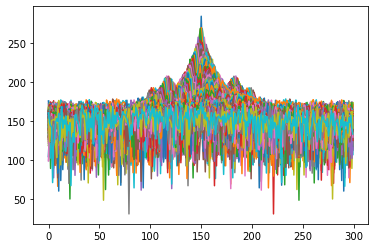

In [36]:
# imgAngle = np.angle(imgFFT2)
# print("img fft angle is: ", imgAngle)
dft = cv2.dft(np.float32(current_img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
imgMagnitude = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
print(imgMagnitude)
plt.plot(imgMagnitude)
print(np.median(imgMagnitude))

In [37]:
# power calculations
power = imgMagnitude**2
median_pow = np.median(power.ravel())
print(power.ravel())
print(median_pow)

[22064.986 25760.309 23126.758 ... 21698.047 19818.016 17760.602]
23242.113


In [38]:
# high pass filtering
dft_shift[centerRow - centerRectangle: centerRow + centerRectangle,
            centerCol - centerRectangle: centerCol + centerRectangle] = 0

dft_i_shift = np.fft.ifftshift(dft_shift)
# print(dft_i_shift)
# plt.imshow(np.abs(FFT2shift))

305061530000.0
[6.9000558e+12 9.0869995e+12 6.3049905e+12 ... 3.3871290e+14 3.5200941e+14
 3.6551484e+14]


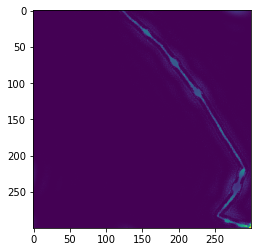

In [39]:
# Inverse Transfer to show the image
img_back = cv2.idft(dft_i_shift)
img_back = (cv2.magnitude(img_back[:,:,0], img_back[:,:,1]))**2
median_img_back = np.median(img_back.ravel())
print(median_img_back)
print(img_back.ravel())
plt.imshow(img_back)
#
# img_HPF_iFFT_shift = np.fft.ifftshift(imgFFT_shift_HPF)
# img_back = cv2.idft(img_HPF_iFFT_shift)
# img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# img_LPF_iFFT_mag = np.abs(img_LPF_iFFT)
# print(img_back)
# plt.imshow(img_back)